## Sketching some waves using python notebooks

Hi all the idea of this is to provide you with some ways to analyze results in our optics class using python notebooks. 

Even if you are not into running them on your own, you can examine the code and the results and learn something from that just fine. 

Here we are going to visualize some aspects of wave behaviour and explore some python functionality.

So, let's go! 

In [3]:
# Comments in python are made using "#", I will use them to notate things ad-hoc, while larger chunkcs of text and equation will be in 
# separate markdown cells such as one above.

# For starters I want to setup my notebook to look the way I like it. This means extend it to fullscreen and set the font of markdown cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.container { font-size:16px !important; }</style>"))

Python is based on the so called packages. It means that the core language provides some functionallity while the special mathematical operations, plotting, and other kinds of functions and operations (say, Fourier Transform) come from different packages. For starters we just want capability to calculate some harmonic and similar functions and to plot. The respective packages are called matplotlib and numpy

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

Nice! For starters let's define our 1D traveling wave (we are still not at harmonics) as an equation, taking three arguments: 

- x : the spatial coordinate
- t : time 
- v : speed of the wave 

Only first two will actually change. We have learned speed of the wave is constant.

In [6]:
# I am going to define the wave as a function:

def gaussian_wave(x,t,v):
    return 1./np.sqrt(2.*np.pi) * np.exp(-(x-v*t)**2.0/2.0)

#### Attention! 

Even though the above cell does not have any output we still have to execute it so our wave function gets defined

In [9]:
# To test how the wave looks like, I am going to first fix the time and then plot the function on an x grid

t = 0 # fixed 
x = np.linspace(0,10,201) # ranges from 0 to 10 in 201 steps (so step is 0.05)
v = 1.0 # in some units 

# calculate our function
wave = gaussian_wave(x,t,v)

# this helps us see if everything is working properly, basically just obtaining the dimension of the wave, it should be the same as x
wave.shape

(201,)

Text(0, 0.5, '$\\Psi(x)$')

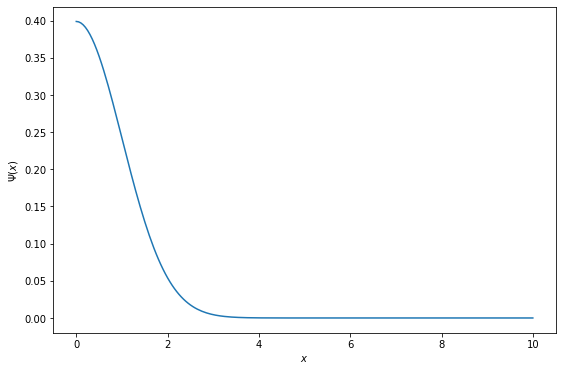

In [10]:
# Finally, let's plot

plt.figure(figsize=[9,6]) # This defines the size of the picture
plt.plot(x,wave) # this actually plots 
plt.xlabel("$x$") # name of x axis
plt.ylabel("$\psi(x)$") # name of y axis 

These fonts look small don't they? Let's fix that, and make them nicer! 

In [16]:
# These lines tell our matlab to use nice fonts and latex rendering:
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

Text(0, 0.5, '$\\psi(x)$')

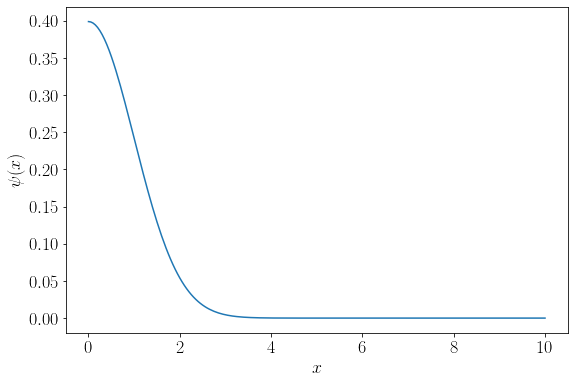

In [17]:
# Aaaand plot again:

plt.figure(figsize=[9,6]) # This defines the size of the picture
plt.plot(x,wave) # this actually plots 
plt.xlabel("$x$") # name of x axis
plt.ylabel("$\psi(x)$") # name of y axis 

Looks nicer doesn't it? Now let's sketch the shape of our wave for two different moments:

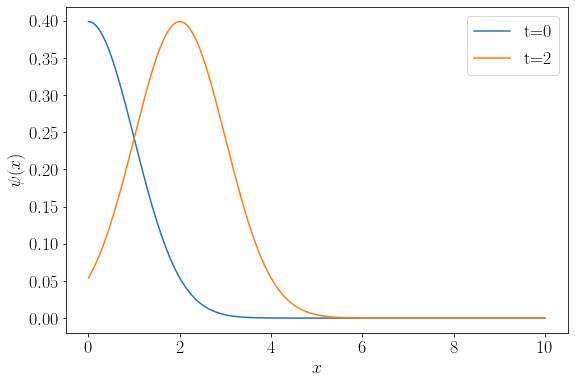

In [18]:
# These two are same as before
x = np.linspace(0,10,201) # ranges from 0 to 10 in 201 steps (so step is 0.05)
v = 1.0 # in some units 

# Now we want to different time instances:
t1 = 0
t2 = 2 
wave1 = gaussian_wave(x,t1,v)
wave2 = gaussian_wave(x,t2,v)

# And plot them straight away:
plt.figure(figsize=[9,6]) # This defines the size of the picture
plt.plot(x,wave1,label='t=0') # plot wave1
plt.plot(x,wave2,label='t=2') # plot wave2 (functionknows to put them on the same plot)
plt.xlabel("$x$") # name of x axis
plt.ylabel("$\psi(x)$") # name of y axis
plt.legend() # this will use our labels in plots to make the legend box

The wave did really travel to the right with time, as we predicted. You can repeat this changing sign in the expression for the wavefunction to see that in the opposite case the wave will travel to the right. 

Let's now explore possibilities of sketching wave with both time and space. For this I have to calculate the values of the function on a 2D grid (x,t), let's see how to do that:

In [19]:
# These two are same as before
x = np.linspace(0,10,201) # ranges from 0 to 10 in 201 steps (so step is 0.05)
t = np.linspace(0,10,201) # same 
v = 1.0 # as before

# Now I want my function on a 2D mash, generally I should provide 2D arrays as x and t to get a 2D output, but it can be done more elegantly:

wave = gaussian_wave(x[:,None],t[None,:],v)
wave.shape

(201, 201)

Magically, the dimensions are correct. (What I basically did is told python to treat x and t as if they had an extra dimension)

Great, how to visualize this wave? Since this wave is a 2D function, what we can do is plot it as a so called 2D plot or rather density plot. 

Practically what we are doing is displaying it as image where the intensity (or color) is the value of the function:

Text(0, 0.5, '$t$')

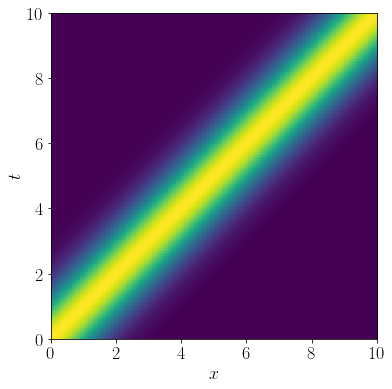

In [23]:
plt.figure(figsize=[9,6]) # This defines the size of the picture
plt.imshow(wave.T,origin='Lower',extent=[x[0],x[-1],t[0],t[-1]]) # plot wave2 (functionknows to put them on the same plot)
plt.xlabel("$x$") # name of x axis
plt.ylabel("$t$") # name of y axis

What we basically see here is that the pulse of a gaussian shape travels to the right with time! 

To conclude this intro let's show ourselves that the time averaging when measuring irradiance really works the way it does. 

This will also be important later when we start talking about coherence. 

To do this we will analyze wave behavior over the time.

Text(0, 0.5, '$E(t)$')

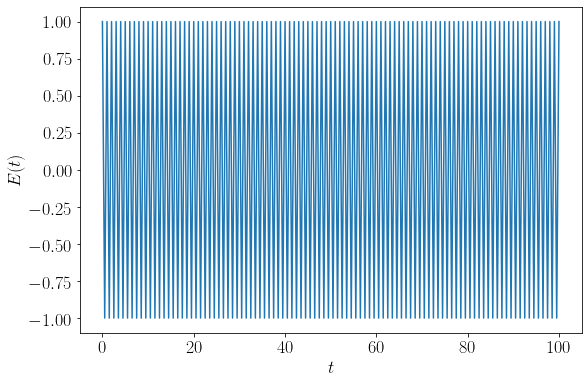

In [26]:
# I will use some generic units for angular frequency and wavenumber, that is for period and the wavelength. 
# Later in the course we will use real units to compare with what we see

llambda = 1.
k = 2.*np.pi/llambda

T = 1 
omega = 2.*np.pi/llambda

t = np.linspace(0,100,401) # Many periods, 401 points on the interval 0 to 100

E0 = 1.0 # I will also ignore other constants 

# Now we want a hamornic wave: 
z = 0
E = E0 * np.cos(k*z - omega*t)

# And sketch time evolution:
plt.figure(figsize=[9,6]) # This defines the size of the picture
plt.plot(t,E) # plot wave1
plt.xlabel("$t$") # name of x axis
plt.ylabel("$E(t)$") # name of y axis


Many periods indeed, but remember we are averaging Poynting vector, not electic field :
$$S(t) \propto E^2(t) $$ 


Text(0, 0.5, '$S(t)$')

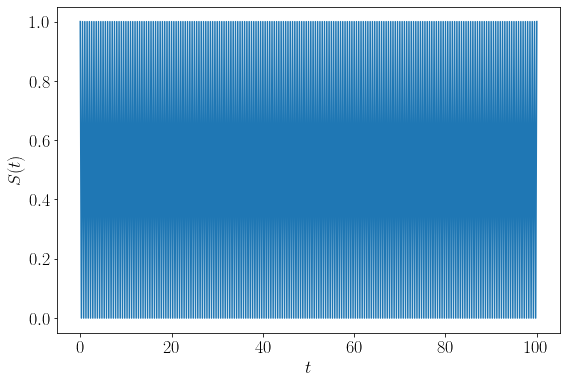

In [29]:
S = E**2.0
plt.figure(figsize=[9,6]) # This defines the size of the picture
plt.plot(t,S) # plot wave1
plt.xlabel("$t$") # name of x axis
plt.ylabel("$S(t)$") # name of y axis

Now finally let's do the averaging. What I am going to do is add together all the S, multiply with the t step (this plays the role of $dt$), and divide by the total duration:

In [30]:
S_avg = np.sum(S) * (t[1]-t[0]) / 100.
print ("Average Poynting vector is : ",S_avg)

Average Poynting vector is :  0.5025


Don't worry too much about the fact the value is 0.5025, by increasing the number of time points you will fix it easily, and get the more precise answer, but never the exact one because we are calculating the integral numerically. Try it out! :) 

Next time, we will use python to sketch interference pattern.